# 🤖 Multi-Layer Perceptron (MLP) with Scikit-Learn

## 🧠 What is a Multi-Layer Perceptron (MLP)?

A **Multi-Layer Perceptron (MLP)** is a type of feedforward artificial neural network (ANN).
It is composed of layers of interconnected nodes:

- **Input Layer**: Receives the input features.
- **Hidden Layers**: One or more intermediate layers that transform inputs via weights and activation functions.
- **Output Layer**: Produces the final result (e.g., class labels).

Each node (except in the input layer) uses an **activation function** to introduce non-linearity, enabling the model to learn complex patterns.

## 🛠️ Getting Started with MLPClassifier

### 1. Installation
Before using `MLPClassifier`, ensure that `scikit-learn` is installed in your Python environment:

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2. Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### 3. Loading and Preparing Data
We'll use the famous Iris dataset for this demonstration.

In [3]:
# Load dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target labels

In [4]:
# Convert to DataFrame for easier EDA
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Display first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%  

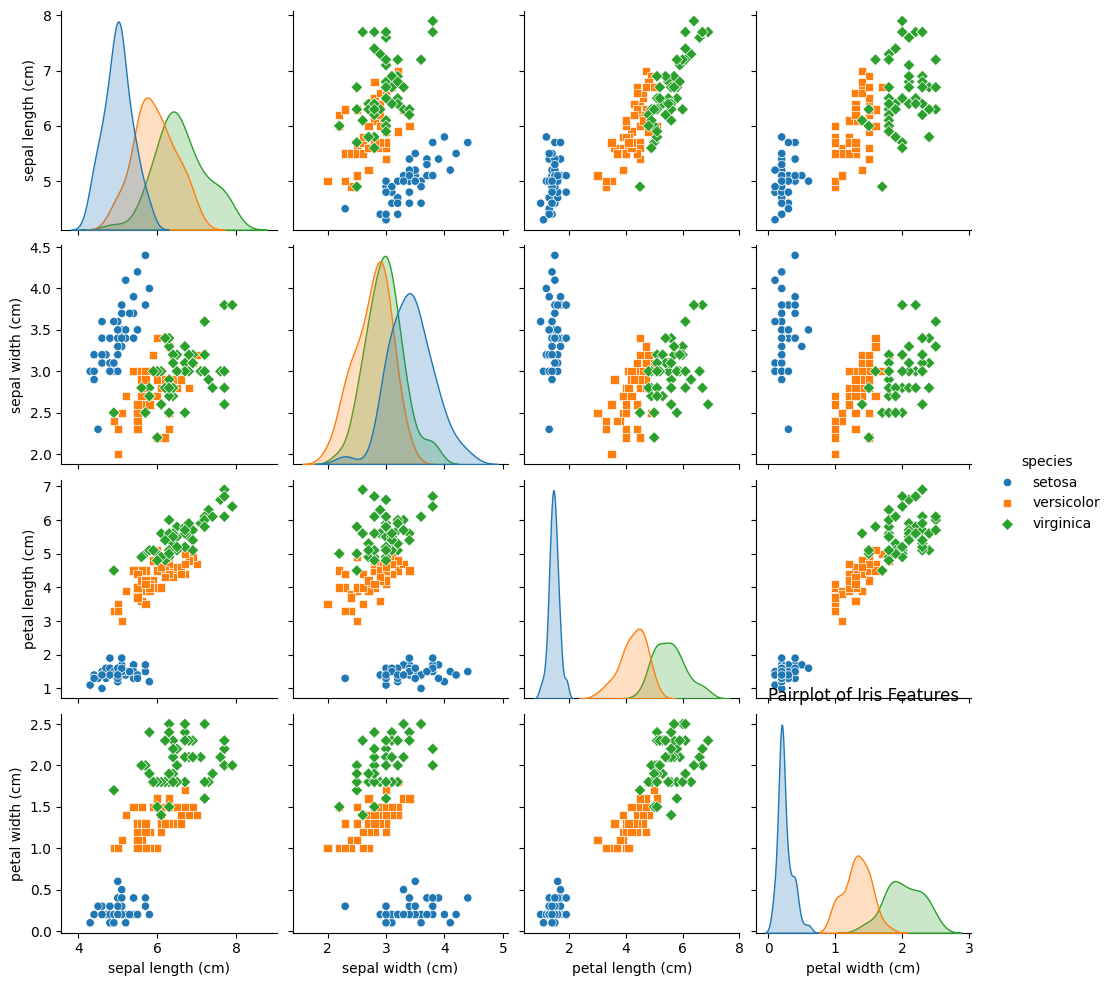

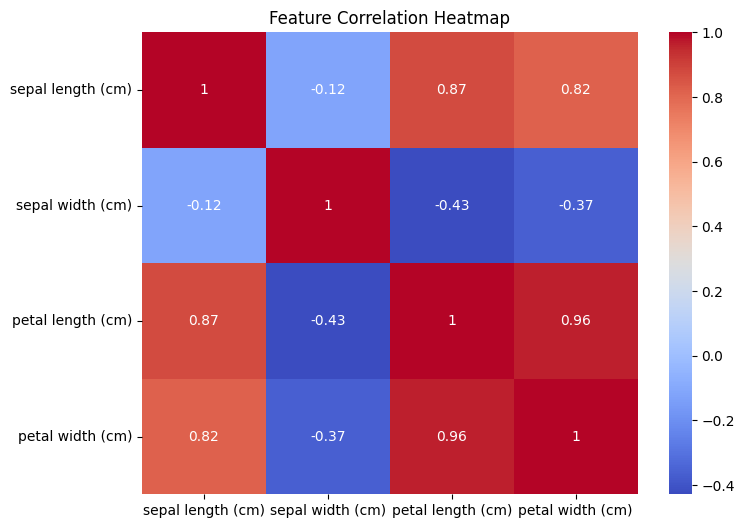

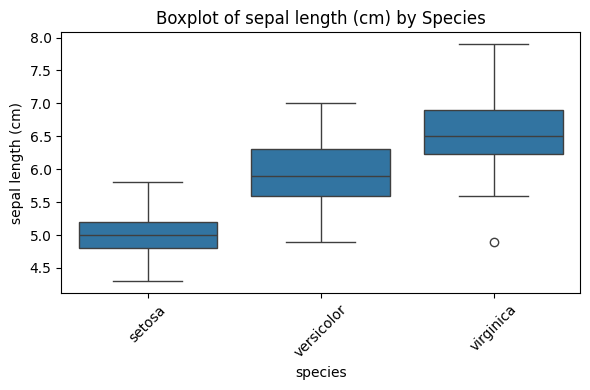

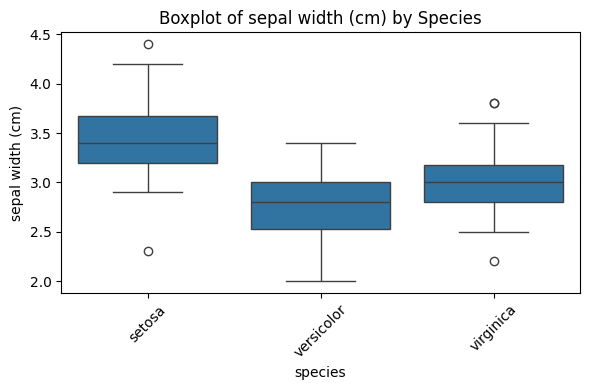

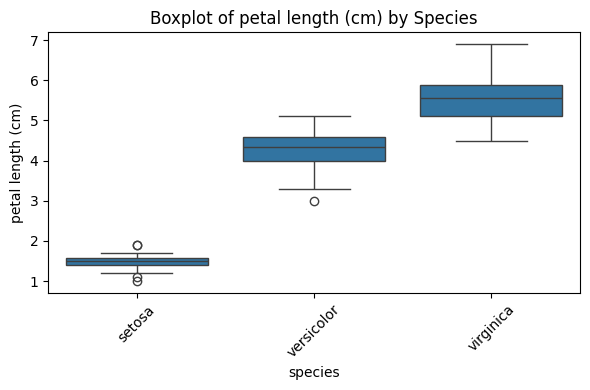

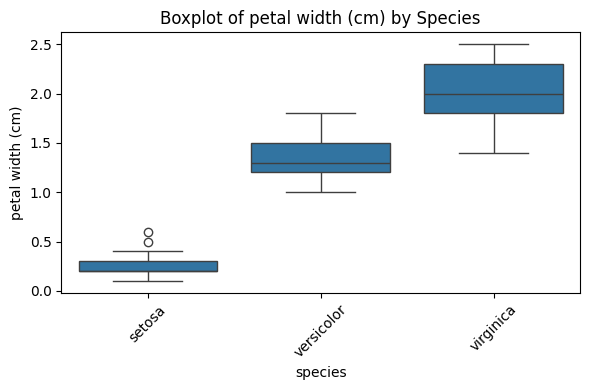

In [5]:
### Basic Information
print("Dataset Info:")
print(iris_df.info())

# ### Summary Statistics
print("\nSummary Statistics:")
print(iris_df.describe())

# ### Check Class Distribution
print("\nClass Distribution:")
print(iris_df['species'].value_counts())

# ### Pairplot to Visualize Relationships
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.title("Pairplot of Iris Features", y=1.02)
plt.show()

# ### Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ### Boxplots for Each Feature by Species
for col in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=col, data=iris_df)
    plt.title(f"Boxplot of {col} by Species")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 🔧 Preparing Data for Modeling

In [6]:
# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is crucial for MLPs as they are sensitive to the scale of input features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 🧪 Training the MLPClassifier

In [13]:
# Initialize the MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10), 
    max_iter=1000, 
    random_state=42
)

### Explanation of Parameters:
 - `hidden_layer_sizes=(10, 10)`: Two hidden layers with 10 neurons each.
 - `max_iter=1000`: Maximum iterations allowed for the solver to converge.

In [14]:
# Train the model on training data
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

## 📊 Evaluating the Model

In [15]:
# Predict test data
y_pred = mlp.predict(X_test)

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


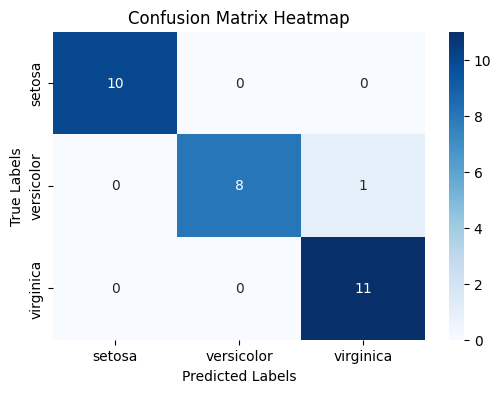

In [16]:
# Evaluation metrics
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Alternatively using sklearn's built-in display
# ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot(cmap='Blues')
# plt.title('Confusion Matrix Display')
# plt.show()

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## ⚙️ Understanding Key Parameters

- `hidden_layer_sizes`: Tuple of number of neurons per hidden layer (e.g., (100,), (10, 10))
- `activation`: Activation function for hidden layers:
    - `'identity'`: No activation (linear)
    - `'logistic'`: Sigmoid function
    - `'tanh'`: Hyperbolic tangent
    - `'relu'`: Rectified Linear Unit (default)
- `solver`: Algorithm for weight optimization:
    - `'lbfgs'`: Quasi-Newton method
    - `'sgd'`: Stochastic Gradient Descent
    - `'adam'`: Adaptive moment estimation (default)
- `alpha`: L2 regularization parameter (helps reduce overfitting)
- `learning_rate`: Learning rate schedule:
    - `'constant'`, `'invscaling'`, `'adaptive'`

## 🧠 Use Cases of MLPClassifier
- **Classification Tasks**: Multi-class or binary classification.
- **Pattern Recognition**: Handwriting, speech recognition.
- **Medical Diagnosis**: Predict diseases using patient data.
- **Finance**: Fraud detection, credit risk analysis.

## 🧪 Advanced Example: Hyperparameter Tuning with GridSearchCV
Let's use `GridSearchCV` to find the best hyperparameters for our MLPClassifier.

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
parameter_space = {
    'hidden_layer_sizes': [(10, 10), (20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize model
#mlp = MLPClassifier(max_iter=1000)

In [19]:
# GridSearchCV setup
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Output best parameters
print("Best parameters found:")
print(clf.best_params_)

Best parameters found:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 🔁 Retrain the Model with Optimal Hyperparameters

In [21]:
# Use the best parameters from GridSearchCV to train a new model
best_mlp = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(10, 10),
    learning_rate='constant',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# Fit the model on the training data
best_mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10), max_iter=1000,
              random_state=42)

## 📈 Evaluate the Tuned Model on Test Data

In [22]:
y_pred_best = best_mlp.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 📊 Visualize the Confusion Matrix for Tuned Model

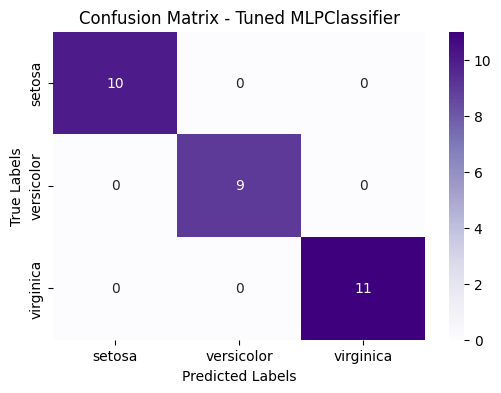

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Purples', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Tuned MLPClassifier')
plt.show()

# # Alternatively using built-in display
# ConfusionMatrixDisplay(cm_best, display_labels=iris.target_names).plot(cmap='Purples')
# plt.title('Confusion Matrix Display - Tuned Model')
# plt.show()

## 💾 Model Persistence

In [26]:
import joblib

# Save the model
joblib.dump(best_mlp, 'best_mlp_model.pkl')
# Save the scaler after fitting
joblib.dump(scaler, 'scaler.pkl')

# Load it later
loaded_model = joblib.load('best_mlp_model.pkl')

## 🧪 Additional Recommendations

In [25]:
# 1. Cross-validation for robustness
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_mlp, X, y, cv=5)
print("\nCross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 1.        ]
Mean accuracy: 0.9666666666666668


 2. Consider experimenting with deeper or wider architectures
    For instance: hidden_layer_sizes=(50,), (30, 10), etc.
 3. Try other solvers or learning rates if convergence or performance isn't ideal
 4. For more interpretability, explore SHAP or permutation importance in other frameworks
 5. Monitor training performance and add EarlyStopping if using deep learning frameworks like Keras
 The model is now fine-tuned and ready for use in production or deployment scenarios.

## 🧩 Tips for Effective Use
- **Always scale your features** before training.
- **Avoid overfitting** by tuning `alpha`, reducing hidden layers, or using dropout (in deeper frameworks).
- **Increase `max_iter`** or use early stopping if the model does not converge.

## 📚 Additional Resources
- [Scikit-learn MLPClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [GeeksForGeeks Guide](https://www.geeksforgeeks.org/classification-using-sklearn-multi-layer-perceptron/)
- [Comprehensive Introduction](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
